In [0]:
#second data set
import os

os.environ['KAGGLE_USERNAME'] = "rohinisubramaniam" # username from the json file

os.environ['KAGGLE_KEY'] = "c906b034b18b8b832d669e8427237a99" # key from the json file

!kaggle competitions download -c sberbank-russian-housing-market


  0% 0.00/4.46M [00:00<?, ?B/s]
100% 4.46M/4.46M [00:00<00:00, 74.0MB/s]
  0% 0.00/18.6k [00:00<?, ?B/s]
100% 18.6k/18.6k [00:00<00:00, 16.3MB/s]
 29% 5.00M/17.1M [00:00<00:00, 50.9MB/s]
100% 17.1M/17.1M [00:00<00:00, 109MB/s] 
  0% 0.00/25.4k [00:00<?, ?B/s]
100% 25.4k/25.4k [00:00<00:00, 25.7MB/s]
  0% 0.00/66.5k [00:00<?, ?B/s]
100% 66.5k/66.5k [00:00<00:00, 58.3MB/s]


In [0]:
## 

**sberbank-russian-housing-market**

In [0]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import os
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm_notebook


Unzip data

In [0]:
!unzip \*.zip


Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   

Archive:  train.csv.zip
  inflating: train.csv               
   creating: __MACOSX/
  inflating: __MACOSX/._train.csv    

Archive:  test.csv.zip
  inflating: test.csv                
  inflating: __MACOSX/._test.csv     

Archive:  macro.csv.zip
  inflating: macro.csv               

4 archives were successfully processed.


In [0]:
## reading files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')



In [0]:
train

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,NaN,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,Investment,Otradnoe,1.005305e+07,175518,0.096270,0.300323,9753,5088.0,4,10311,12721.0,4,0,NaN,1,0,10,3,no,0,9,6,no,yes,no,yes,no,no,no,...,647.89,1112.68,880.28,8,20,30,15,5,1,0,5,12,1,0,29,3,15.52,17.24,44,838601,53,2548292,207,689.95,1156.08,923.02,18,63,59,47,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06

In [0]:
#check for nan values
train.isna().sum()

train.columns[train.isnull().any()].tolist()  # to get a list instead of an Index object


['life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'preschool_quota',
 'school_quota',
 'hospital_beds_raion',
 'raion_build_count_with_material_info',
 'build_count_block',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'raion_build_count_with_builddate_info',
 'build_count_before_1920',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995',
 'metro_min_walk',
 'metro_km_walk',
 'railroad_station_walk_km',
 'railroad_station_walk_min',
 'ID_railroad_station_walk',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500',
 'cafe_sum_1000_min_price_avg',
 'cafe_sum_1000_max_price_avg',
 'cafe_avg_price_1000',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_avg_price_1500',
 'cafe_sum_2000_min_price_avg',
 'cafe_su

In [0]:
test.isna().sum()
test.columns[test.isnull().any()].tolist()  # to get a list instead of an Index object


['life_sq',
 'build_year',
 'state',
 'product_type',
 'preschool_quota',
 'school_quota',
 'hospital_beds_raion',
 'raion_build_count_with_material_info',
 'build_count_block',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'raion_build_count_with_builddate_info',
 'build_count_before_1920',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995',
 'metro_min_walk',
 'metro_km_walk',
 'railroad_station_walk_km',
 'railroad_station_walk_min',
 'ID_railroad_station_walk',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500',
 'cafe_sum_1000_min_price_avg',
 'cafe_sum_1000_max_price_avg',
 'cafe_avg_price_1000',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_avg_price_1500',
 'green_part_2000',
 'cafe_sum_2000_min_price_avg',
 'cafe_sum_2000_max_price_avg',
 'c

In [0]:
#imputation
for i in train.columns:
    if train[i].dtype == 'object':
      train[i] = train[i].fillna(train[i].mode().iloc[0])
    if (train[i].dtype == 'int' or train[i].dtype == 'float'):
      train[i] = train[i].fillna(np.mean(train[i]))


for i in test.columns:
    if test[i].dtype == 'object':
      test[i] = test[i].fillna(test[i].mode().iloc[0])
    if (test[i].dtype == 'int' or test[i].dtype == 'float'):
      test[i] = test[i].fillna(np.mean(test[i]))

## label encoding
number = LabelEncoder()
for i in train.columns:
    if (train[i].dtype == 'object'):
      train[i] = number.fit_transform(train[i].astype('str'))
      train[i] = train[i].astype('object')

for i in test.columns:
    if (test[i].dtype == 'object'):
      test[i] = number.fit_transform(test[i].astype('str'))
      test[i] = test[i].astype('object')



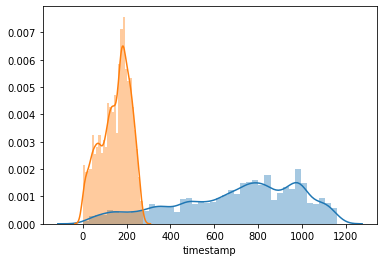

In [0]:
import seaborn as sns

sns.distplot(train['timestamp'])
sns.distplot(test['timestamp'])


In [0]:
cov_tr = train.drop(columns=['id','price_doc'])
cov_te = test.drop(columns=['id'])



In [0]:
def covshiftdetection(train, test, cv = 10, limit = 0.7, n_samples = None):
    
    #labels for train and test set
    train['set'] = 0
    test['set'] = 1

    ## Consider taking smaller sample in case of huge datasets
    #if n_samples is not None:
      #  print("Taking {} random samples from the data".format(n_samples))
      #  train = train.sample(n_samples, random_state=102)
       # test = test.sample(n_samples, random_state=102)


    combinedData = train.append(test)
    X = combinedData.drop(columns=['set'], axis=1)
    y = combinedData['set']

    model = RandomForestClassifier(n_estimators = 50, max_depth = 5, min_samples_leaf = 5)
    shifted_features = []

    for feature in tqdm_notebook(X.columns):
        score = cross_val_score(model, pd.DataFrame(X[feature]), y, cv=cv, scoring='roc_auc')
        if np.mean(score) > limit:
            shifted_features.append(feature)
            print(feature,np.mean(score))

    return shifted_features


In [0]:
shifted_features = covshiftdetection(cov_tr, cov_te, cv = 10, limit = 0.7,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


timestamp 0.8029762715794149
life_sq 0.8074594333884031
build_year 0.7833083254877609
kitch_sq 0.8887133731470757
state 0.7499251062268038
preschool_quota 0.7310171364323921
school_quota 0.7328761457493094
hospital_beds_raion 0.8805733439755551
raion_build_count_with_material_info 0.7000553904598313
cafe_sum_500_min_price_avg 0.8463283735824311
cafe_sum_500_max_price_avg 0.8442979224212314
cafe_avg_price_500 0.8442074255510359



In [0]:
#Covariate shift adaptation¶


In [0]:
from sklearn.model_selection import StratifiedKFold as SKF
from sklearn.metrics import roc_auc_score as AUC
from sklearn.svm import SVC

def impTrainWeights(train, test):
    #labels for train and test set
    train['set'] = 0
    test['set'] = 1

    combinedData = train.append(test)
    X = combinedData.drop(columns=['set'], axis=1)
    y = combinedData['set']

    clf = RandomForestClassifier()
    # clf = SVC(probability=True)
    predic = np.zeros(y.shape)
    skf = SKF(n_splits=10, shuffle=True, random_state=888)

    for kfold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            
        clf.fit(X_train, y_train)
        probs = clf.predict_proba(X_test)[:, 1]
        predic[test_idx] = probs

    all_weights = np.exp(predic)*len(train)/len(test)
    tr_weights = all_weights[:len(train)]

    return tr_weights

##REF: https://github.com/ayeright/covariate-shift-adaptation/blob/master/covariate_shift_adaption/importance_estimation.py
##REF: https://github.com/erlendd/covariate-shift-adaption/blob/master/Supervised%20classification%20by%20covariate%20shift%20adaption.ipynb

In [0]:
## calculating training weights according to importances
train_weights = impTrainWeights(cov_tr, cov_te)


Training discriminator model for fold 0
Training discriminator model for fold 1
Training discriminator model for fold 2
Training discriminator model for fold 3
Training discriminator model for fold 4
Training discriminator model for fold 5
Training discriminator model for fold 6
Training discriminator model for fold 7
Training discriminator model for fold 8
Training discriminator model for fold 9


In [0]:
y = train['price_doc']
X = train.drop(['price_doc'], axis=1)

In [0]:
#Training and evaluation without considering weights¶


In [0]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  make_scorer
from sklearn.metrics import mean_squared_error


In [0]:
#Train without weights
clf = RandomForestClassifier(n_jobs=-1,max_depth=5)
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
predic_no_weight = clf.predict(test)

In [0]:
# Train prediction Model with weight
# main Model
clf = RandomForestClassifier(n_jobs=-1,max_depth=5)
clf.fit(X,y, sample_weight=train_weights)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
predic_with_weight = clf.predict(test) 

In [0]:
sub_df = pd.DataFrame({'id':test['id']})

In [0]:
sub_df['price_doc'] = predic_no_weight

In [0]:
sub_df.to_csv("submission_no_weight.csv", index=False)

In [0]:
!kaggle competitions submit -c sberbank-russian-housing-market -f /content/submission_no_weight.csv -m "1st submission with CS"

100% 105k/105k [00:00<00:00, 342kB/s]
Successfully submitted to Sberbank Russian Housing Market

In [0]:
sub_df = pd.DataFrame({'id':test['id']})
sub_df['price_doc'] = predic_with_weight
sub_df.to_csv("submission_with_weight.csv", index=False)

In [0]:
!kaggle competitions submit -c sberbank-russian-housing-market -f /content/submission_with_weight.csv -m "1st submission without CS"

100% 105k/105k [00:00<00:00, 341kB/s]
Successfully submitted to Sberbank Russian Housing Market

In [0]:
!kaggle competitions submissions -c sberbank-russian-housing-market

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
